# QF 627 Programming and Computational Finance
## Lesson 03 | Stock Trading Strategies

> Hi, Team 👋 Thank you for opening the lecture note script 🙂

> In this week's lesson, we will learn about the development of a simple `momentum` strategy. Our journey will begin with the formulation and programming of a basic algorithmic trading strategy. Following that, we'll backtest our strategy and evaluate its performance using the `pandas` library.

## DEPENDENCIES

In [1]:
# Load libraries.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns

import time

import datetime # as dt
import re

import altair as alt ####
import plotly.express as px ####
import xlrd ####

import warnings
warnings.filterwarnings("ignore")

# Setting baseline seed
np.random.seed(230905)

# Set print options.

np.set_printoptions(precision = 3)

plt.style.use("fivethirtyeight") # FiveThirtyEight Theme

# mpl.rcParams["axes.grid"] = True
# mpl.rcParams["grid.color"] = "grey"
# mpl.rcParams["grid.alpha"] = 0.25

# mpl.rcParams["axes.facecolor"] = "white"

# mpl.rcParams["legend.fontsize"] = 14

%matplotlib inline

In [2]:
import pandas_datareader.data as web
from pandas_datareader import data as pdr

import yfinance as yf

(
    yf
    .pdr_override()
)

# pdr
# .get_data_yahoo()

## 👉 <a id = "top">Learning Pointers</a> 👈 

## [1. Rolling Statistics Revisited](#p1)

> ### <font color = red> Rolling Statistics </font>

## [2. Building Simple Momentum Trading Strategy](#p2)

> ### <font color = red> SMA </font>

## [3. Backtesting Trading Strategy](#p3)

> ### <font color = red> Backtesting is NOT Forecasting </font>

## [4. Performance Metrics](#p4)

> ### <font color = red> Sharpe, MDD, & CAGR </font>

## [5. What We Learned](#p5)

> ### <font color = red> Thus far... </font>

## <a id = "p1">1. </a> <font color = "green"> Rolling Statistics Revisited </font>  [back to table of contents](#top)

### Analytics Contexts


> `Rolling statistics` are useful in the `technical analysis` of stocks. Their use can be compared to `fundamental analysis`, which focuses on financial reports and the strategic positions of the company whose stock is being examined.

> The use of `two simple moving averages` (SMAs) is a basic trading strategy based on technical analysis.

•	A trader should go `long` on a stock (or any financial instrument in general) when its `shorter-term SMA is above its longer-term SMA`, and should go short when the opposite holds true.

•	This concept can easily be implemented with `pandas`, thanks to the `DataFrame object`.

> Rolling statistics are generally used only when there is enough data, given the window parameter specification.

In [3]:
pdr.get_data_yahoo("META",datetime.datetime(2014,9,1),datetime.datetime(2021,8,31))

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-02,75.010002,76.699997,74.820000,76.680000,76.680000,34979000
2014-09-03,77.139999,77.480003,75.599998,75.830002,75.830002,32389000
2014-09-04,75.889999,76.930000,75.529999,75.949997,75.949997,26676000
2014-09-05,76.099998,77.379997,75.599998,77.260002,77.260002,29476000
2014-09-08,77.260002,78.169998,77.010002,77.889999,77.889999,28183000
...,...,...,...,...,...,...
2021-08-24,363.660004,367.959991,361.839996,365.510010,365.510010,9235100
2021-08-25,365.600006,370.859985,365.399994,368.390015,368.390015,9684500
2021-08-26,368.380005,369.440002,364.130005,364.380005,364.380005,7888700


In [4]:
# MAANG

stocks =\
    ["META", # Note that FB has been changed to META
     "AMZN",
     "AAPL",
     "NFLX",
     "GOOG"] # GOOGL

In [5]:
# start = 
# end = 

In [6]:
def extract_sp(stocks, start, end):
    def data(ticker):
        return(pdr.get_data_yahoo(ticker,
                                  start = start,
                                  end = end)
              )
    FAANG_Stock = map(data, stocks)
    return(pd.concat(FAANG_Stock,
                     keys = stocks,
                     names = ["Company", "Date"]
                    )
          )

In [7]:
FAANG =\
    extract_sp(stocks,
               datetime.datetime(2014, 9, 1),
               datetime.datetime(2021, 8, 31)
              )

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
FAANG

Open        High         Low       Close  \
Company Date                                                         
META    2014-09-02   75.010002   76.699997   74.820000   76.680000   
        2014-09-03   77.139999   77.480003   75.599998   75.830002   
        2014-09-04   75.889999   76.930000   75.529999   75.949997   
        2014-09-05   76.099998   77.379997   75.599998   77.260002   
        2014-09-08   77.260002   78.169998   77.010002   77.889999   
...                        ...         ...         ...         ...   
GOOG    2021-08-24  141.543503  143.007507  141.353500  142.398499   
        2021-08-25  142.882996  143.313004  142.439499  142.949997   
        2021-08-26  142.618500  143.134796  142.091507  142.123001   
        2021-08-27  142.112503  145.011002  142.020004  144.550507   
        2021-08-30  144.704498  146.489502  144.600006  145.469498   

                     Adj Close    Volume  
Company Date                              
META    2014-09-02   76.680000  34979000  
        2014-09-03   75.830002  32389000  
        2014-09-04   75.949997  26676000  
        2014-09-05   77.260002  29476000  
        2014-09-08   77.889999  28183000  
...                        ...       ...  
GOOG    2021-08-24  142.398499  15126000  
        2021-08-25  142.949997  12838000  
        2021-08-26  142.123001  14922000  
        2021-08-27  144.550507  24562000  
        2021-08-30  145.469498  16916000  

[8810 rows x 6 columns]

In [9]:
FAANG[["Adj Close"]].reset_index()

,Company,Date,Adj Close
0,META,2014-09-02,76.680000
1,META,2014-09-03,75.830002
2,META,2014-09-04,75.949997
3,META,2014-09-05,77.260002
4,META,2014-09-08,77.889999
...,...,...,...
8805,GOOG,2021-08-24,142.398499
8806,GOOG,2021-08-25,142.949997
8807,GOOG,2021-08-26,142.123001
8808,GOOG,2021-08-27,144.550507


In [10]:
Daily_Closing_Price =\
(
FAANG[["Adj Close"]]
    .reset_index()
    .pivot(index = "Date",
           columns = "Company",
           values = "Adj Close")
)

In [11]:
Daily_Closing_Price

Company,AAPL,AMZN,GOOG,META,NFLX
Date,,,,,
2014-09-02,23.017218,17.118999,28.787464,76.680000,68.085716
2014-09-03,22.045723,16.950001,28.817881,75.830002,68.198570
2014-09-04,21.863018,17.297501,29.019327,75.949997,67.524284
2014-09-05,22.052414,17.319000,29.223766,77.260002,67.954285
2014-09-08,21.916489,17.117001,29.405268,77.889999,68.475716
...,...,...,...,...,...
2021-08-24,147.714203,165.289001,142.398499,365.510010,553.409973
2021-08-25,146.470261,164.959000,142.949997,368.390015,547.580017
2021-08-26,145.660706,165.800003,142.123001,364.380005,550.119995


In [12]:
AMZN = Daily_Closing_Price[["AMZN"]]
AMZN

Company,AMZN
Date,
2014-09-02,17.118999
2014-09-03,16.950001
2014-09-04,17.297501
2014-09-05,17.319000
2014-09-08,17.117001
...,...
2021-08-24,165.289001
2021-08-25,164.959000
2021-08-26,165.800003


In [13]:
window = 40

In [14]:
#mean() # Rolling Average 

AMZN["mean"] =\
    (
    Daily_Closing_Price[["AMZN"]]
    .rolling(window = window)
    .mean()
    )

In [15]:
AMZN.iloc[:40]

Company,AMZN,mean
Date,,
2014-09-02,17.118999,NaN
2014-09-03,16.950001,NaN
2014-09-04,17.297501,NaN
2014-09-05,17.319000,NaN
2014-09-08,17.117001,NaN
2014-09-09,16.487499,NaN
2014-09-10,16.566500,NaN
2014-09-11,16.525999,NaN
2014-09-12,16.559500,NaN


In [16]:
# min() # Rolling Min.

AMZN["min"] =\
    (
    Daily_Closing_Price[["AMZN"]]
    .rolling(window = window)
    .min()
    )

In [17]:
# max() # Rolling Max.

AMZN["max"] =\
    (
    Daily_Closing_Price[["AMZN"]]
    .rolling(window = window)
    .max()
    )

In [18]:
# median() # Rolling Median

AMZN["median"] =\
    (
    Daily_Closing_Price[["AMZN"]]
    .rolling(window = window)
    .median()
    )

In [19]:
# std() # Rolling STD

AMZN["std"] =\
    (
    Daily_Closing_Price[["AMZN"]]
    .rolling(window = window)
    .std()
    )

In [20]:
# Exponentially Weighted Moving Average 
# Putting greater weights into the prices of recent days

AMZN["EWMA"] =\
    (
    Daily_Closing_Price[["AMZN"]]
    .ewm(halflife = 0.5,
         min_periods = window)
    .mean()
    )

> The halflife parameter in the Exponentially Weighted Moving Average (EWMA) method represents the period over which the weights for the observations decrease by half. 

> It's a measure of the extent to which the more recent observations are given relatively more weight compared to the older observations.

> The halflife is set to 0.5. This means that for the exponentially decreasing weights applied to the observations in the series, the weight of any given observation will decrease by half over a span of 0.5 periods.

> Given such a short halflife, this EWMA will give a very high preference to the most recent observations, and older observations will have their weights decay very rapidly. It would make the resulting EWMA very responsive (or sensitive) to recent changes in the data series but might also make it more volatile.

> In typical quant. finance applications, the halflife value would be larger (e.g., 10, 20, or 30 days) depending on the specific need, so a halflife of 0.5 is quite aggressive in terms of responsiveness. Make sure to chose this value intentionally based on the specific requirements of your analysis.

In [21]:
AMZN

Company,AMZN,mean,min,max,median,std,EWMA
Date,,,,,,,
2014-09-02,17.118999,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-03,16.950001,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-04,17.297501,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-05,17.319000,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-08,17.117001,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-08-24,165.289001,173.564312,159.387497,186.570496,172.207497,8.842646,164.579903
2021-08-25,164.959000,173.378112,159.387497,186.570496,171.828247,8.945459,164.864225
2021-08-26,165.800003,173.222913,159.387497,186.570496,170.223999,9.023353,165.566059


In [22]:
AMZN =\
(
    AMZN
    .dropna()
)

In [23]:
AMZN.head()

Company,AMZN,mean,min,max,median,std,EWMA
Date,,,,,,,
2014-10-27,14.4985,16.044688,14.353,17.319000,16.128500,0.671433,14.543570
2014-10-28,14.7795,15.986200,14.353,17.319000,16.116000,0.677321,14.720518
2014-10-29,14.7060,15.930100,14.353,17.319000,16.103251,0.688288,14.709630
2014-10-30,14.9535,15.871500,14.353,17.319000,16.093750,0.668379,14.892532
2014-10-31,15.2730,15.820350,14.353,17.117001,16.005750,0.632066,15.177883


<Axes: xlabel='Date'>

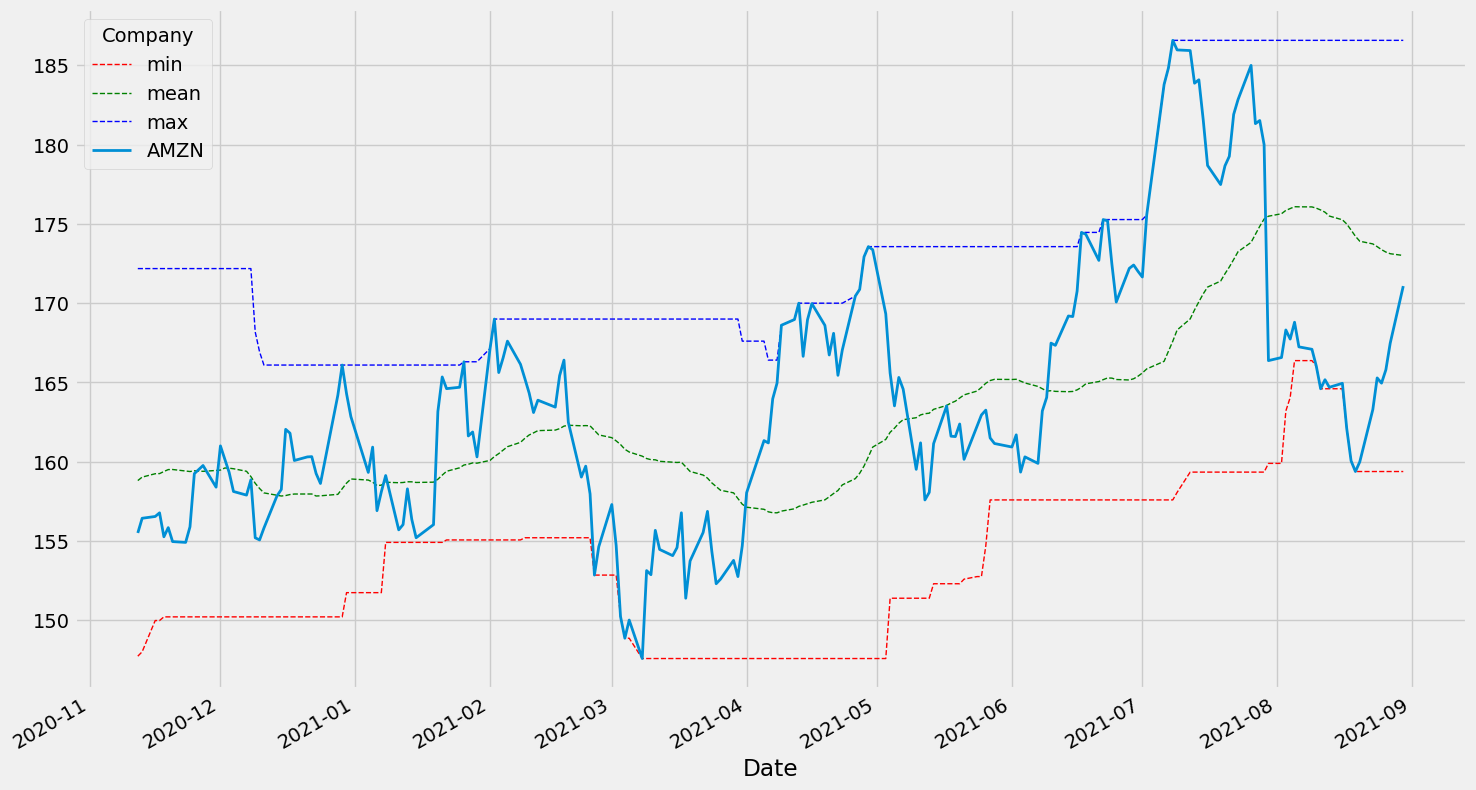

In [24]:
ax =\
    (
     AMZN[["min", "mean", "max"]]
     .iloc[-200: ]
     .plot(figsize = [16, 10],
           style = ["r--", "g--", "b--"],
           lw = 1)
    )

(
    Daily_Closing_Price[["AMZN"]]
    .iloc[-200:]
    .plot(ax = ax,
          lw = 2)
)

#### Let's calculate the values for the shorter-term and longer-term SMAs.

> Then visualize the stock price data, along with the two SMA time series.

In [25]:
Daily_Closing_Price["shorter_MA"] =\
    (
    Daily_Closing_Price[["AMZN"]]
    .rolling(window = 20)
    .mean()
    )

Daily_Closing_Price["longer_MA"] =\
    (
    Daily_Closing_Price[["AMZN"]]
    .rolling(window = 100)
    .mean()
    )

<Axes: xlabel='Date'>

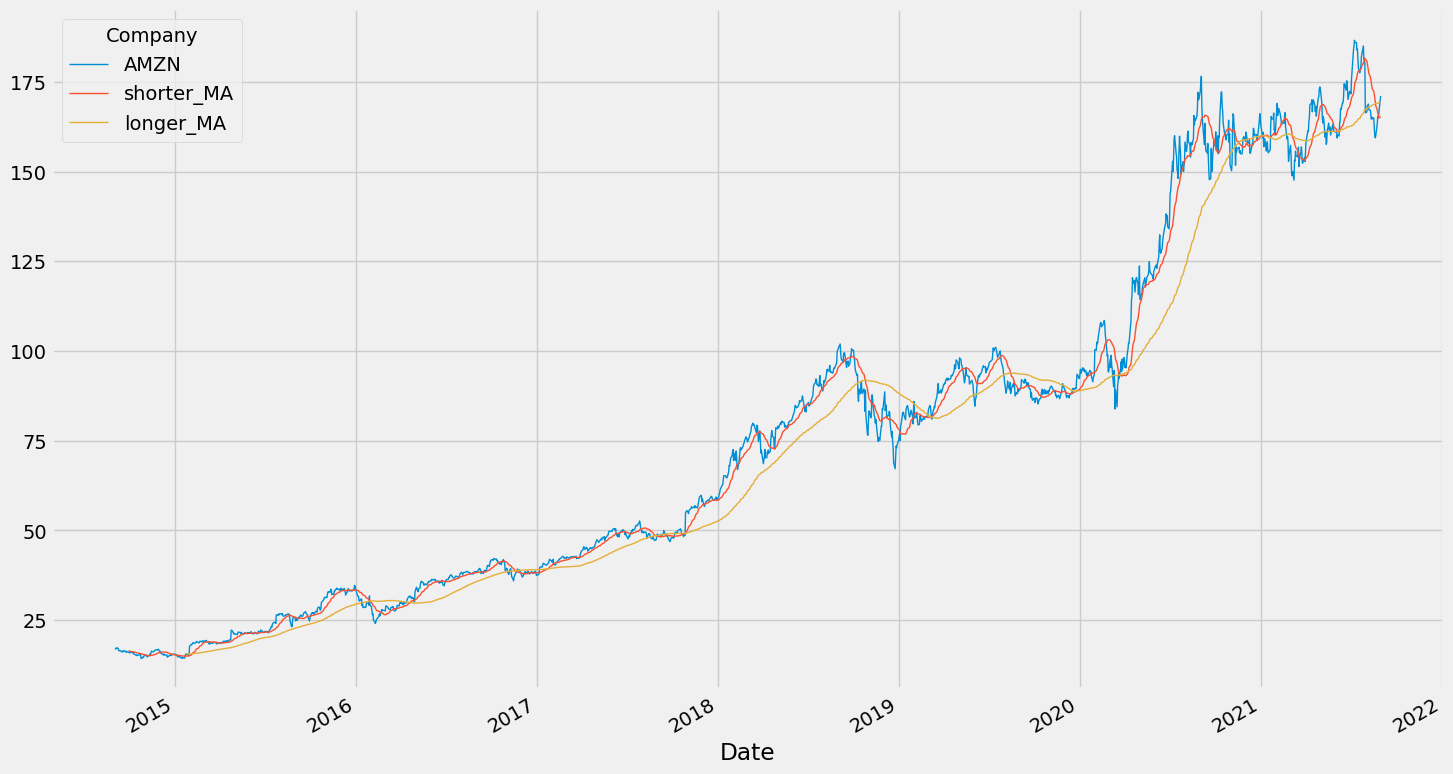

In [26]:
(Daily_Closing_Price[["AMZN", "shorter_MA", "longer_MA"]]
    .plot(figsize = [16, 10],
          lw = 1)
)

> Here, the SMAs can be used to generate positions to implement a trading strategy.

> Building a trading strategy will be discussed below. But here, let’s visualize a long position by a value of 1 and a short position by a value of –1.

> The change in the position can be visually detected, when the two lines representing the SMA time series cross.

In [27]:
Daily_Closing_Price

Company,AAPL,AMZN,GOOG,META,NFLX,shorter_MA,longer_MA
Date,,,,,,,
2014-09-02,23.017218,17.118999,28.787464,76.680000,68.085716,NaN,NaN
2014-09-03,22.045723,16.950001,28.817881,75.830002,68.198570,NaN,NaN
2014-09-04,21.863018,17.297501,29.019327,75.949997,67.524284,NaN,NaN
2014-09-05,22.052414,17.319000,29.223766,77.260002,67.954285,NaN,NaN
2014-09-08,21.916489,17.117001,29.405268,77.889999,68.475716,NaN,NaN
...,...,...,...,...,...,...,...
2021-08-24,147.714203,165.289001,142.398499,365.510010,553.409973,166.462125,169.106485
2021-08-25,146.470261,164.959000,142.949997,368.390015,547.580017,165.634275,169.142710
2021-08-26,145.660706,165.800003,142.123001,364.380005,550.119995,164.924475,169.188800


In [28]:
Daily_Closing_Price =\
(
    Daily_Closing_Price
    .dropna()
)

In [29]:
Daily_Closing_Price["Trading_Positions"] =\
    (
    np
    .where(Daily_Closing_Price["shorter_MA"] > Daily_Closing_Price["longer_MA"],
           1, -1)
    )

In [30]:
Daily_Closing_Price.head()

Company,AAPL,AMZN,GOOG,META,NFLX,shorter_MA,longer_MA,Trading_Positions
Date,,,,,,,,
2015-01-23,25.283262,15.6195,26.923580,77.830002,62.494286,15.032825,15.673340,-1
2015-01-26,25.310116,15.4830,26.687229,77.500000,63.794285,15.049400,15.656980,-1
2015-01-27,24.423927,15.3375,25.860500,75.779999,64.881432,15.043550,15.640855,-1
2015-01-28,25.804684,15.1955,25.430182,76.239998,63.208572,15.023225,15.619835,-1
2015-01-29,26.608068,15.5890,25.463091,78.000000,63.400002,15.026925,15.602535,-1


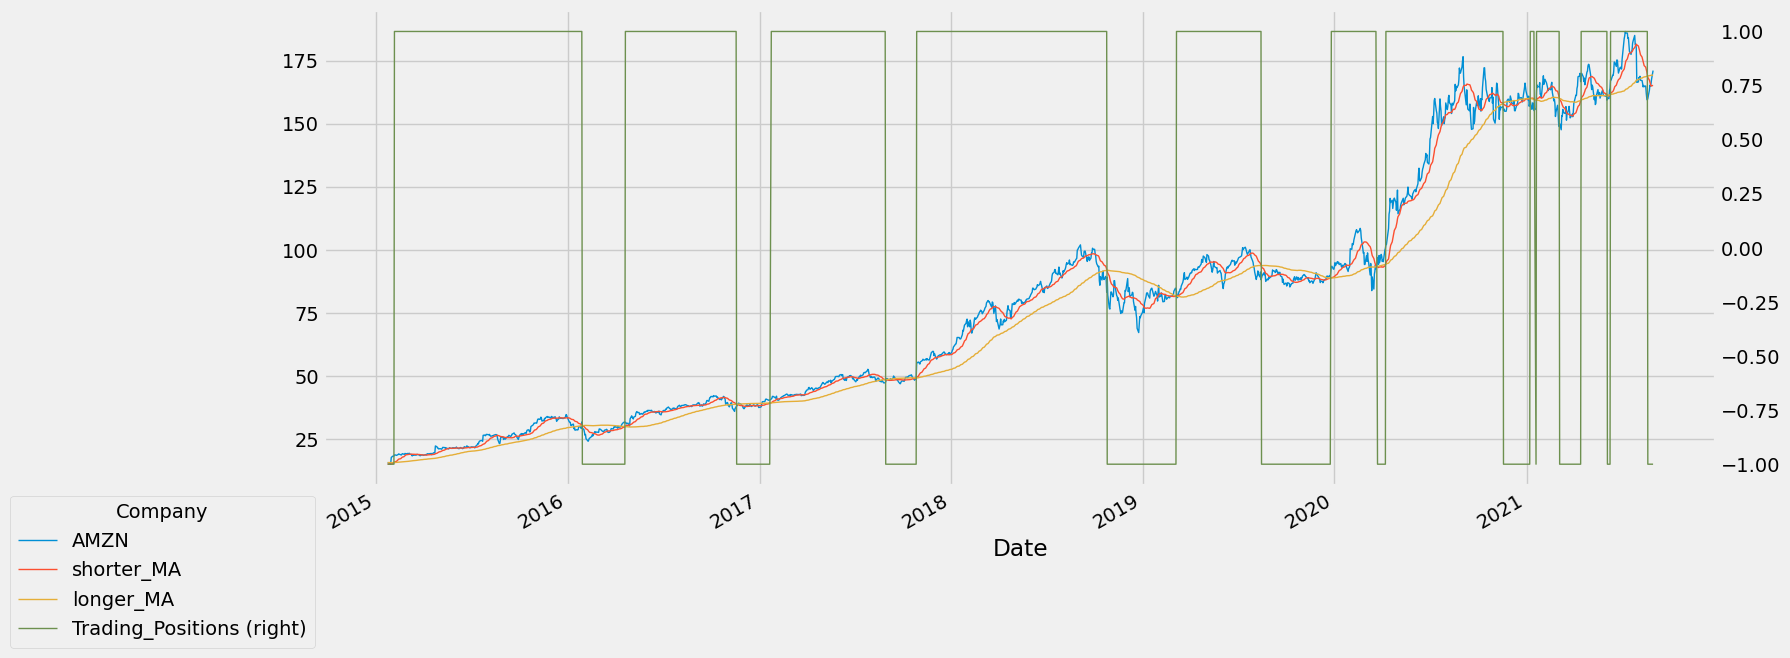

In [31]:
ax =\
    (Daily_Closing_Price[["AMZN",
                          "shorter_MA",
                          "longer_MA",
                          "Trading_Positions"]]
     .plot(figsize = [16, 7],
           secondary_y = "Trading_Positions",
           lw = 1)
    )

(ax
 .get_legend()
 .set_bbox_to_anchor((.00, .00)
                    )
)

## <a id = "p2">2.</a>  <font color = "green"> Simple Momentum Trading Strategy </font>  [back to table of contents](#top)

<a id="trading"></a>
### A Gentle Introduction to Stock Trading Strategies: A Simple Momentum Trading Strategy

> Now, we will discuss the development of a simple `momentum` strategy. We’ll go through that development step by step, firstly by formulating and programming a simple algorithmic trading strategy. We’ll then backtest our strategy, assessing its performance with the `pandas` library.

> Building a trading strategy requires multiple stages of work. As you will see later in our course, when you learn about machine learning (no pun intended here), building a trading strategy is an iterative process of training, tuning, optimizing, and assessing the performance of your model.

> As a starting point in learning about stock trading strategies, you will learn momentum strategy (a.k.a. divergence or trend trading). This strategy is based on a theory that movement of a quantity will continue in its current direction. Thus, stocks have momentum, or upward or downward trends, and you can detect and exploit those trends.

#### A moving average crossover and a dual moving average crossover are examples of the momentum strategy.

- The `moving average crossover` is when the price of an asset moves from one side of a moving average to the other. This `crossover` denotes a `change in momentum`, and can be used as the point at which to make the decision to `enter or exit` the market.

<br>

- A `dual moving average crossover` occurs when a short-term average crosses a long-term average. This signal is taken as identifying that momentum is shifting in the direction of the short-term average. A `buy signal` is when the short-term average crosses the long-term average and scores above it. A `sell signal` is presented by a short-term average crossing a long-term average and falling below it.

> Here, when you go long, you think that the stock price will go up and will sell at a higher price in the future (buy signal)

> When you go short, you sell your stock, expecting to be able to buy it back at a lower price and realize a profit (sell signal).

> Below, we will go through the strategy building step by step.

#### Step 1: `Define` two lookback periods, of `short` and `long` duration

> Here we will create two variables and assign one integer per variable.

> It is obvious, but make sure that the integer you assign to the short window is shorter than the integer you assign to the long window variable 🙂

In [32]:
META =\
    (pdr
        .get_data_yahoo("META",
                        start = datetime.datetime(2014, 3, 1),
                        end = datetime.datetime(2023, 2, 15)
                       )
    )

META.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-08,190.000000,190.830002,182.919998,183.429993,183.429993,36139100
2023-02-09,186.130005,186.649994,177.270004,177.919998,177.919998,37118800
2023-02-10,176.350006,178.889999,173.350006,174.149994,174.149994,33433600
2023-02-13,178.220001,181.000000,175.820007,179.429993,179.429993,31463200
2023-02-14,177.160004,181.509995,175.880005,179.479996,179.479996,24034600


In [33]:
# Setting look back periods

short = 20 # make this tunable object (this should be your iterables)
long = 60 # make this tunable object

#### Step 2: Create an empty signals DataFrame

> Make sure to copy the index of your stock data so that we can start calculating the daily `buy or sell` signal 👀 

In [34]:
BUY_or_SELL =\
    (
    pd
    .DataFrame(index = META.index)
    )
    
BUY_or_SELL

""
Date
2014-03-03
2014-03-04
2014-03-05
2014-03-06
2014-03-07
...
2023-02-08
2023-02-09
2023-02-10


> You might want to make a column named `BUY_or_SELL` in your empty DataFrame, and set the value for all rows in that column to 0.0.

In [35]:
BUY_or_SELL["BUY_or_SELL"] = 0.0
BUY_or_SELL

,BUY_or_SELL
Date,
2014-03-03,0.0
2014-03-04,0.0
2014-03-05,0.0
2014-03-06,0.0
2014-03-07,0.0
...,...
2023-02-08,0.0
2023-02-09,0.0
2023-02-10,0.0


> Steps 1 and 2 above set the stage for our main work.

#### Step 3: Assign the set of short and long SMAs (over the respective short and long time windows)

> Here, please use the function `rolling()` to initiate your rolling window calculations. 

> Specifically, you will set the following three arguments.

* `window` 
* `min_period`
* `center`  

> Input either SHORT or LONG, with `1` as the minimum number of data points in the window that are required to have a value, and False, so that the labels are not set at the center of the window.

> Here, don’t forget to chain the function `mean()` so that we can calculate the rolling mean.

In [36]:
# Shorter-term

BUY_or_SELL["shorter_SMA"] =\
    (
    META["Close"]
    .rolling(window = short,
             min_periods = 1,
             center = False)
    .mean()
    )

# Longer-term

BUY_or_SELL["longer_SMA"] =\
    (
    META["Close"]
    .rolling(window = long,
             min_periods = 1,
             center = False)
    .mean()
    )

BUY_or_SELL

,BUY_or_SELL,shorter_SMA,longer_SMA
Date,,,
2014-03-03,0.0,67.410004,67.410004
2014-03-04,0.0,68.105003,68.105003
2014-03-05,0.0,69.260002,69.260002
2014-03-06,0.0,69.655001,69.655001
2014-03-07,0.0,69.684001,69.684001
...,...,...,...
2023-02-08,0.0,153.149500,129.568667
2023-02-09,0.0,155.400999,130.650334
2023-02-10,0.0,157.272999,131.649167


> Now you have calculated the mean average of the short and long windows.

#### Step 4: Create a signal when the short moving average crosses the long moving average

> Note that this is only for the period greater than the shortest moving average window. [Recall that this is the step we performed above during our refresher on rolling statistics.](#rolling)

In [37]:
BUY_or_SELL["BUY_or_SELL"][short: ] =\
(
    np
    .where(BUY_or_SELL["shorter_SMA"][short: ] > BUY_or_SELL["longer_SMA"][short: ],
           1.0,
           0.0
          )
)
    
BUY_or_SELL

,BUY_or_SELL,shorter_SMA,longer_SMA
Date,,,
2014-03-03,0.0,67.410004,67.410004
2014-03-04,0.0,68.105003,68.105003
2014-03-05,0.0,69.260002,69.260002
2014-03-06,0.0,69.655001,69.655001
2014-03-07,0.0,69.684001,69.684001
...,...,...,...
2023-02-08,1.0,153.149500,129.568667
2023-02-09,1.0,155.400999,130.650334
2023-02-10,1.0,157.272999,131.649167


#### Step 5: Calculate the difference between the signals to make trading orders

> We can differentiate between long and short positions, within the column of our DF, where we are `buying` or `selling` stock.

In [38]:
BUY_or_SELL["Positions"] =\
(    BUY_or_SELL["BUY_or_SELL"]
     .diff()
)

BUY_or_SELL

,BUY_or_SELL,shorter_SMA,longer_SMA,Positions
Date,,,,
2014-03-03,0.0,67.410004,67.410004,NaN
2014-03-04,0.0,68.105003,68.105003,0.0
2014-03-05,0.0,69.260002,69.260002,0.0
2014-03-06,0.0,69.655001,69.655001,0.0
2014-03-07,0.0,69.684001,69.684001,0.0
...,...,...,...,...
2023-02-08,1.0,153.149500,129.568667,0.0
2023-02-09,1.0,155.400999,130.650334,0.0
2023-02-10,1.0,157.272999,131.649167,0.0


> Print the signals DataFrame and inspect the results. `Make sure to fully digest what the positions and the signal columns denote in this DF.`

> When you have taken the time to understand the results of the trading strategy, visualize the short and long moving averages, along with the buy and sell signals.

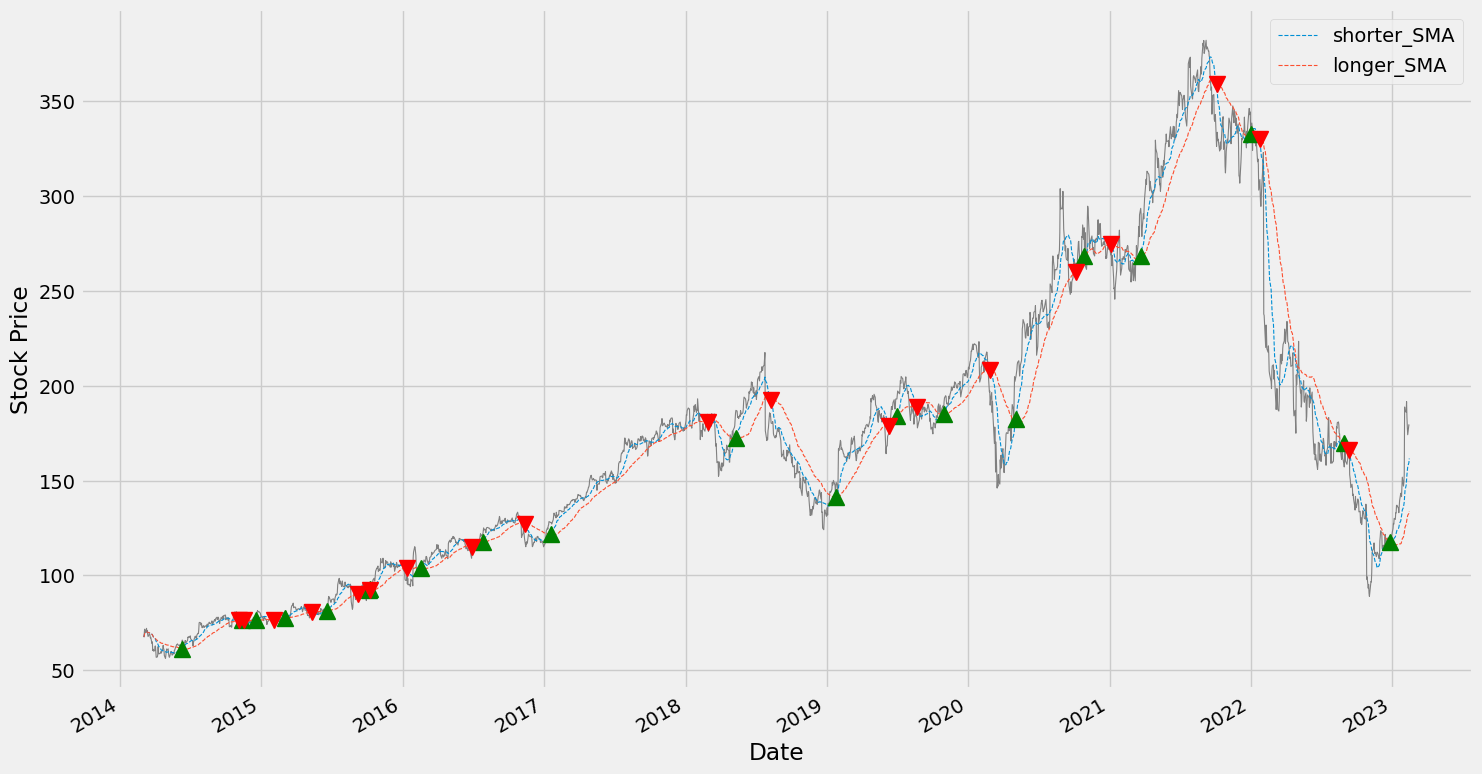

In [39]:
fig =\
    (plt
     .figure(figsize = [16, 10]
            )
    )

sub =\
(    fig
    .add_subplot(111,
                 ylabel = "Stock Price")
)

(META["Close"]
 .plot(ax = sub,
       color = "grey",
       lw = 0.80) # This is for closing price
)

(BUY_or_SELL[["shorter_SMA", 
              "longer_SMA"]]
            .plot(ax = sub,
                  style = ["--", "--"],
                  lw = 0.80
                 )
)

# Buy

(
    sub
    .plot(BUY_or_SELL.loc[BUY_or_SELL.Positions == 1.0].index,
          BUY_or_SELL.shorter_SMA[BUY_or_SELL.Positions == 1.0],
          "^",
          color = "green",
          markersize = 12)

)

# Sell

(
    sub
    .plot(BUY_or_SELL.loc[BUY_or_SELL.Positions == -1.0].index,
          BUY_or_SELL.shorter_SMA[BUY_or_SELL.Positions == -1.0],
          "v",
          color = "red",
          markersize = 12)
)

plt.show()

## <a id = "p3">3.</a>  <font color = "green"> Backtesting Trading Strategy </font>  [back to table of contents](#top)

> Now let’s backtest our trading strategy and assess its performance.

#### Elements of Backtesting

- `Data interface` to access your data (here, pandas or pandas-datareader).
- `Strategy` to formulate a signal to go long or short.
- `Portfolio` to generate orders and manage profit and loss (`PnL`).
- `Execution interface` to send orders to the broker and get confirmation that the stock was bought or sold.

> Here, as a starting point in your learning, we will consider the first three items above (but not the execution interface, yet).

> Let’s learn how to create a portfolio which can generate orders and manages the PnL, with yet another `step by step` approach (Yay~) 

#### Step 1: Create a variable (`our_capital`) to set our initial capital, along with a new DataFrame, `our_position`

> We copy the index from another DataFrame.

> This is the signals DataFrame, where we want to consider the period for which we have generated signals.

In [40]:
Capital = 5e6

In [41]:
Position =\
    (
    pd
    .DataFrame(index = BUY_or_SELL.index)
    .fillna(0.0)
    )

Position

""
Date
2014-03-03
2014-03-04
2014-03-05
2014-03-06
2014-03-07
...
2023-02-08
2023-02-09
2023-02-10


#### Step 2: Create a new column, META, in `our_position`

> On the days that the `BUY_or_SELL` signal is 1 and the short moving average crosses the long moving average (for the period greater than the shortest moving average window), we’ll buy 200 shares.

> On the days on which the signal is zero, the final result will be zero.

In [42]:
Position["META"] =\
    (200 * BUY_or_SELL["BUY_or_SELL"]
    )

Position

,META
Date,
2014-03-03,0.0
2014-03-04,0.0
2014-03-05,0.0
2014-03-06,0.0
2014-03-07,0.0
...,...
2023-02-08,200.0
2023-02-09,200.0
2023-02-10,200.0


#### Step 3: Create a new DF portfolio to store the market value of an open position

In [43]:
Portfolio =\
(    Position
    .multiply(META["Adj Close"],
              axis = 0)
)

Portfolio

,META
Date,
2014-03-03,0.000000
2014-03-04,0.000000
2014-03-05,0.000000
2014-03-06,0.000000
2014-03-07,0.000000
...,...
2023-02-08,36685.998535
2023-02-09,35583.999634
2023-02-10,34829.998779


#### Step 4: Create a DF that stores the `difference_in_shares_owned`

In [44]:
difference_in_shares_owned =\
(
    Position
    .diff()
)

difference_in_shares_owned

,META
Date,
2014-03-03,NaN
2014-03-04,0.0
2014-03-05,0.0
2014-03-06,0.0
2014-03-07,0.0
...,...
2023-02-08,0.0
2023-02-09,0.0
2023-02-10,0.0


> `Now the game is on. Our backtesting begins here.`

#### Step 5: Create a new column, `our_holdings`

> This column will store the value of the positions or shares we have bought, multiplied by the `Adj Close` price.

In [45]:
Portfolio["our_holdings"] =\
    (
    Position
    .multiply(META["Adj Close"],
              axis = 0)
    ).sum(axis = 1)

In [46]:
Portfolio

,META,our_holdings
Date,,
2014-03-03,0.000000,0.000000
2014-03-04,0.000000,0.000000
2014-03-05,0.000000,0.000000
2014-03-06,0.000000,0.000000
2014-03-07,0.000000,0.000000
...,...,...
2023-02-08,36685.998535,36685.998535
2023-02-09,35583.999634,35583.999634
2023-02-10,34829.998779,34829.998779


#### Step 6: Create a new column, `our_cash`

> This is the capital remaining to spend.

> It can be calculated by taking `Capital` and subtracting `our_holdings` (the price that we paid when buying stock).

In [47]:
Portfolio["our_cash"] =\
(    Capital - (difference_in_shares_owned
               .multiply(META["Adj Close"], axis = 0)
               ).sum(axis = 1)
                .cumsum()
)
Portfolio

,META,our_holdings,our_cash
Date,,,
2014-03-03,0.000000,0.000000,5.000000e+06
2014-03-04,0.000000,0.000000,5.000000e+06
2014-03-05,0.000000,0.000000,5.000000e+06
2014-03-06,0.000000,0.000000,5.000000e+06
2014-03-07,0.000000,0.000000,5.000000e+06
...,...,...,...
2023-02-08,36685.998535,36685.998535,5.007364e+06
2023-02-09,35583.999634,35583.999634,5.007364e+06
2023-02-10,34829.998779,34829.998779,5.007364e+06


#### Step 7: Create a `total` column for `our_portfolio` DF

> This will contain the `sum` of `our_cash` and `holdings that we own`.

In [48]:
Portfolio["total"] =\
    Portfolio["our_cash"] + Portfolio["our_holdings"]

Portfolio

,META,our_holdings,our_cash,total
Date,,,,
2014-03-03,0.000000,0.000000,5.000000e+06,5.000000e+06
2014-03-04,0.000000,0.000000,5.000000e+06,5.000000e+06
2014-03-05,0.000000,0.000000,5.000000e+06,5.000000e+06
2014-03-06,0.000000,0.000000,5.000000e+06,5.000000e+06
2014-03-07,0.000000,0.000000,5.000000e+06,5.000000e+06
...,...,...,...,...
2023-02-08,36685.998535,36685.998535,5.007364e+06,5.044050e+06
2023-02-09,35583.999634,35583.999634,5.007364e+06,5.042948e+06
2023-02-10,34829.998779,34829.998779,5.007364e+06,5.042194e+06


#### Step 8: Create a `returns` column for our_portfolio DF

In [49]:
Portfolio["returns"] =\
(    Portfolio["total"]
    .pct_change()
)

In [50]:
Portfolio

,META,our_holdings,our_cash,total,returns
Date,,,,,
2014-03-03,0.000000,0.000000,5.000000e+06,5.000000e+06,NaN
2014-03-04,0.000000,0.000000,5.000000e+06,5.000000e+06,0.000000
2014-03-05,0.000000,0.000000,5.000000e+06,5.000000e+06,0.000000
2014-03-06,0.000000,0.000000,5.000000e+06,5.000000e+06,0.000000
2014-03-07,0.000000,0.000000,5.000000e+06,5.000000e+06,0.000000
...,...,...,...,...,...
2023-02-08,36685.998535,36685.998535,5.007364e+06,5.044050e+06,-0.000325
2023-02-09,35583.999634,35583.999634,5.007364e+06,5.042948e+06,-0.000218
2023-02-10,34829.998779,34829.998779,5.007364e+06,5.042194e+06,-0.000150


#### VISUALIZE

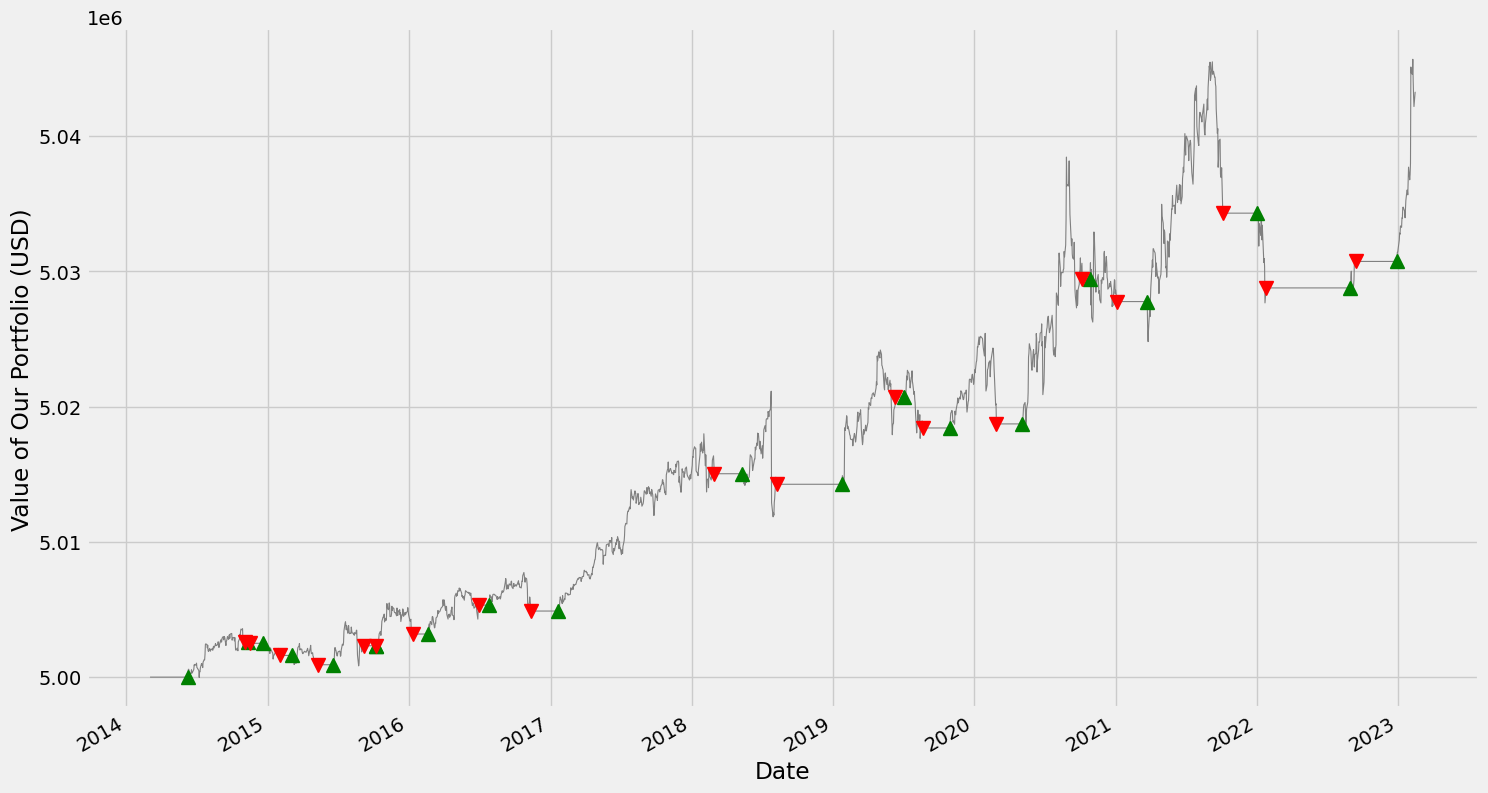

In [51]:
fig =\
    (plt.
     figure(figsize = [16, 10]
           )
    )

sub =\
    (fig
    .add_subplot(111,
                 ylabel = "Value of Our Portfolio (USD)")
    )

(
    Portfolio["total"]
    .plot(ax = sub,
          color = "grey",
          lw = 0.80)
)

# Buy

(
    sub
    .plot(Portfolio.loc[BUY_or_SELL.Positions == 1.0].index,
          Portfolio.total[BUY_or_SELL.Positions == 1.0],
          "^",
          color = "green",
          markersize = 10
         )
)

# Sell
(
    sub
    .plot(Portfolio.loc[BUY_or_SELL.Positions == -1.0].index,
          Portfolio.total[BUY_or_SELL.Positions == -1.0],
          "v",
          color = "red",
          markersize = 10
         )
)

plt.show()

> Now we have learned a trading strategy and backtested it. 

> Note that this is not the end of your trading strategy learning. You might want to improve your strategy. 

> Later you will learn how to improve the model, using machine learning algorithms such as KMeans, k-Nearest Neighbors (KNN), and Classification or Regression Trees.

> You might want to improve your trading strategy by working with multi-symbol portfolios. As we’ll discuss when assessing our moving average crossover strategy, incorporating only one company or symbol into your strategy rarely provides much information.

> You should use a risk management framework or event-driven backtesting to help mitigate the foresight (lookahead) bias.

## <a id = "p4">4.</a>  <font color = "green"> Performance Metrics </font>  [back to table of contents](#top)

### Performance Metrics: Assessing Our Moving Average Crossover Strategy

> Let’s quickly assess our simple trading strategy by utilizing what pandas offers:

- `Sharpe ratio`;
- `maximum drawdown`;
- `compound annual growth rate (CAGR)`

> Let’s start with the Sharpe ratio. Here, we won’t take the risk-free rate in estimating it.

> Please extend the original trading strategy with more data (from other companies), when using Sharpe ratio.

#### Sharpe Ratio

$$
\begin{equation}
\text{Sharpe Ratio} = \frac{\text{Expected Portfolio Return} - \text{Risk-Free Rate}}{\text{Portfolio Standard Deviation}}
\end{equation}
$$

$$
\begin{equation}
\text{Sharpe Ratio} = \sqrt{253} \times \frac{\text{Average Daily Return}}{\text{Daily Standard Deviation}}
\end{equation}
$$

In [52]:
Sharpe =\
(
    np.sqrt(253) * (Portfolio["returns"].mean() / Portfolio["returns"].std()
                    )
)

Sharpe

0.5146113329777913

> np.sqrt(253) returns the square root of the approximate number of trading days in a year. 

> Multiplying by this factor annualizes the ratio if you are working with daily returns. This is common practice to make the Sharpe ratio more interpretable, as it converts the daily risk and return measures to an annualized basis.

> Note that this is a way to calculate an annualized Sharpe ratio if you're working with daily returns and assuming a risk-free rate of zero. However, if you have a known risk-free rate (e.g., the yield on a 3-month Treasury bill), you should subtract this from the average return in the numerator.

> Sharpe ratio is often compared to other stocks. Please extend the original trading strategy with more data (from other companies).

#### Maximum Drawdown (MDD)

> Maximum drawdown is for measuring the largest single drop, from peak to bottom, in the value of a portfolio ahead of a new peak being achieved. The metric denotes the risk of a portfolio chosen according to a certain strategy.

In [53]:
window = 253

In [54]:
rolling_max =\
(    
    META["Adj Close"]
    .rolling(window = window,
             min_periods = 1)
    .max()
)

> The above returns the rolling maximum adjusted closing price over the previous window days (inclusive of the current day). For each day, it takes the maximum adjusted closing price over the past window days.

In [55]:
daily_drawdown =\
(
    META["Adj Close"] / rolling_max - 1.0
)

> Then, we calculated the daily drawdown, which represents how much the adjusted closing price has dropped from the rolling maximum. 

- If the value is `negative`, it means the current price is below the rolling maximum. 
<br>

- If it's `0`, the current price is the rolling maximum.

In [56]:
max_daily_drawdown =\
(
    daily_drawdown
    .rolling(window = window,
             min_periods = 1)
    .min()
)

> We computed the rolling maximum drawdown over the previous window days. 

> For each day, it looks back over the window days and identifies the largest drawdown (most negative value).

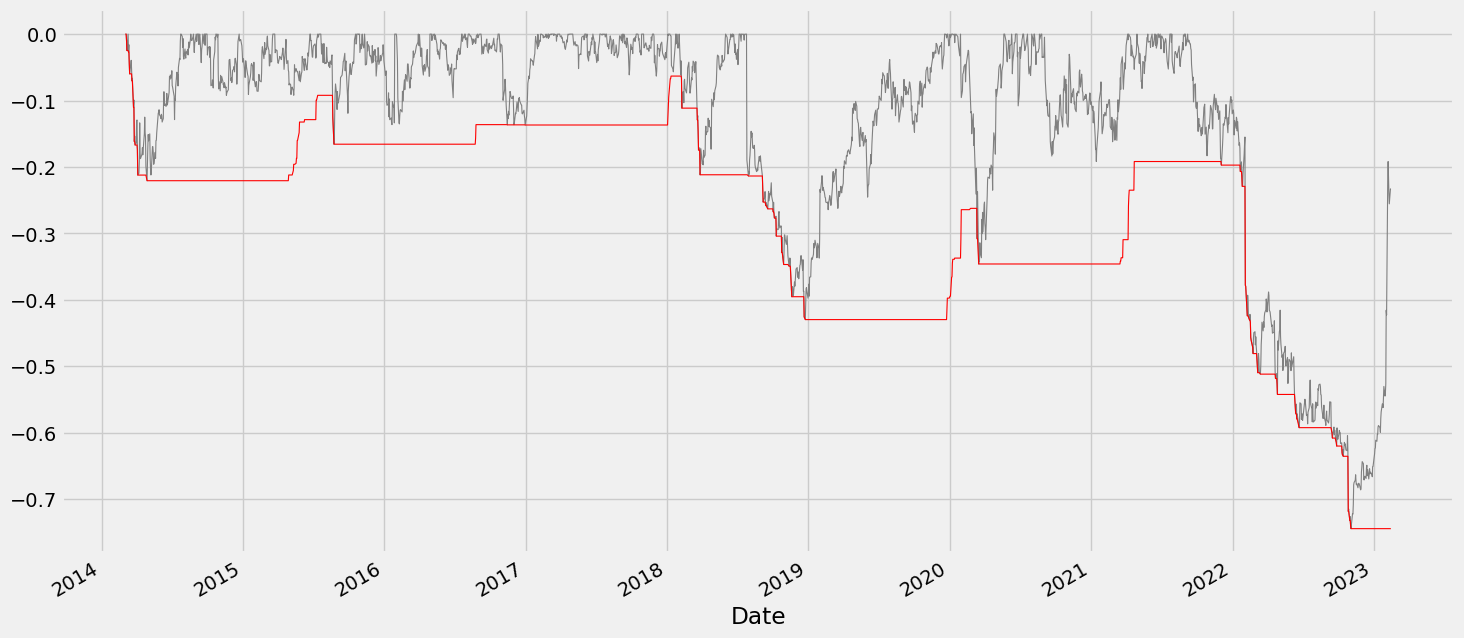

In [57]:
fig = plt.figure(figsize = [16, 8])

daily_drawdown.plot(color = "grey",
                    lw = 0.80)

max_daily_drawdown.plot(color = "red",
                        lw = 0.80)

plt.show()

> Here, the daily drawdown is plotted in grey, and the rolling maximum drawdown is plotted in red.

> This method provides a visual representation of both the daily drawdown and the worst drawdown over the rolling window for each day.

#### Compund Annual Growth Rate

> CAGR gives us a constant rate of return over a time period. 

The rate tells you what you really have at the end of your investment period.

- First, let’s calculate CAGR by dividing the investment’s ending value (EV) by its beginning value (BV).
- Then, raise the result to the power of 1/n, where n is the number of periods.
- Subtract 1 from the result. This is the CAGR.

$$ CAGR = (EV/BV)^{1/n} - 1 $$

In [58]:
days =\
(    (META.index[-1] - META.index[0])
     .days
)

days

3270

> We calculated the difference in days between the last date and the first date in the META dataframe.

In [59]:
CAGR =\
(
    (
      (
        (META["Adj Close"][-1]) / (META["Adj Close"][0])
      )
        **(365.0/days) 
    ) 
    - 1
)

CAGR

0.11550468260901336

> Again, to compute the CAGR, we use the following formula:

$$
\text{CAGR} = \left( \frac{\text{End Value}}{\text{Start Value}} \right)^{\frac{365}{\text{Total Days}}} - 1
$$

Where:

- $\frac{\text{End Value}}{\text{Start Value}}$ represents the total growth factor for the entire period.
- The exponent $\frac{365}{\text{Total Days}}$ serves to annualize the growth rate. The value `365` represents the days in a standard year.
- Subtracting `1` at the end gives us the annual rate of return rather than the total growth factor.

#### Cautionary Tales

> Beyond testing a trading strategy, backtesting tests it on relevant historical data to see if it is a viable strategy before you make any moves. With backtesting, you can simulate and analyze the risk and profitability of trading with a specific strategy over a period of time.

But keep in mind that backtesting has some limitations.

- There could be external events, such as market regime shifts, which are regulatory changes or macroeconomic events, which will affect your backtesting.
- Liquidity constraints, such as a ban on short sales, could also influence your backtesting.
- You could overfit a model (optimization bias) when you ignore strategy rules because you think it’s better like that (interference), or you could accidentally introduce information into past data (foresight bias).

## <a id = "p5">5.</a>  <font color = "green"> What We Learned... </font>  [back to table of contents](#top)

> This section is designated just for you!

> Remember, it's highly beneficial to put what you've learned into your own words. It not only ensures you've grasped the material, but it also boosts your memory retention. Use this space to jot down the key points, concepts, or insights from the lesson. Think of it as your personalized summary, tailored to your understanding.

> Happy note-taking 🖊️

> `Thank you for working with the script, Team 👍`